In [1]:
from importlib import reload

In [2]:
import src.tm_roller; reload(src.tm_roller)

import src.bsln_kde;reload(src.bsln_kde)

from src.tm_roller import TM_ROLLER
from src.bsln_kde import KDE, prep_data
from src.spatial_unit import baltimore_grids
from src.eval_metric import hit_rate


In [3]:
import geopandas as gp
from shapely.geometry import Point

In [4]:
data = prep_data('data/open-baltimore/raw/BPD_Part_1_Victim_Based_Crime_Data.csv', 
                 col_lon='Longitude', col_lat='Latitude', col_date='CrimeDate', to_epsg=3559)

In [5]:
tune_sd = '2013-01-01'
tune_ed = '2013-03-31'
train_tw = 60
vstep = 1
vtw = 1
vsd = '2014-03-02'
ved = '2014-03-10'
grid_size=200

In [6]:
grids = baltimore_grids(grid_size=grid_size)

# for each tune period

In [7]:
method = KDE(verbose=1, bw=283.10344827586209)

In [8]:
str(method)

'KDE(bandwidth=283.1034482758621, timewindow=60, verbose=1)'

In [9]:
# method.tune(data.loc[tune_sd:tune_ed].coords, cv=5, bw_choice=[10, 100])

In [10]:
tmroller = TM_ROLLER(method, data.coords, vsd, ved, step=vstep, tw=vtw)

In [11]:
res = tmroller.eval(hit_rate, grids)

In [12]:
import pandas as pd

In [14]:
df = pd.DataFrame.from_dict(res)

In [17]:
df

,2014-03-02~2014-03-02,2014-03-03~2014-03-03,2014-03-04~2014-03-04,2014-03-05~2014-03-05,2014-03-06~2014-03-06,2014-03-07~2014-03-07,2014-03-08~2014-03-08,2014-03-09~2014-03-09,2014-03-10~2014-03-10
10%,0.411765,0.350877,0.412371,0.417476,0.364486,0.394495,0.461538,0.365591,0.396947
20%,0.694118,0.614035,0.670103,0.524272,0.514019,0.605505,0.644231,0.580645,0.595420
30%,0.823529,0.701754,0.773196,0.631068,0.672897,0.724771,0.701923,0.709677,0.755725
40%,0.929412,0.859649,0.876289,0.776699,0.785047,0.853211,0.826923,0.870968,0.847328
50%,0.952941,0.964912,0.917526,0.893204,0.850467,0.944954,0.894231,0.935484,0.931298
60%,0.964706,0.964912,0.938144,0.961165,0.971963,0.981651,0.942308,0.978495,0.984733
70%,0.988235,0.964912,0.969072,1.000000,1.000000,1.000000,0.951923,1.000000,1.000000
80%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961538,1.000000,1.000000
90%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
%matplotlib inline

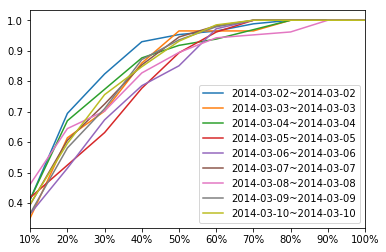

In [16]:
df.plot()